In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

X is all four possible instances of binary inputs in two dimensions. The rows in Y represent all possible logic functions (AND, OR, XOR, etc) given four binary outputs (other than single class outputs such as [0,0,0,0]).

In [2]:
X = np.array([[0,0],
              [0,1], 
              [1,0], 
              [1,1]])

Y = np.array([[0,0,0,1], 
              [0,0,1,0], 
              [0,1,0,0],
              [1,0,0,0],
              [0,0,1,1],
              [0,1,0,1],
              [1,0,0,1],
              [0,1,1,0],
              [1,0,1,0],
              [1,1,0,0],
              [0,1,1,1],
              [1,0,1,1],
              [1,1,0,1],
              [1,1,1,0]])

The function below will train and test the Perceptron's ability to classify each of the 14 logical functions (AND, OR, XOR, etc).

In [3]:
def test_all_y(X, Y):
  from sklearn.metrics import accuracy_score
  r = []
  per_clf = Perceptron()
  for y_i in Y:
    per_clf.fit(X, y_i)
    y_pred = per_clf.predict(X)
    r.append(accuracy_score(y_i, y_pred))
  return r


First, I trained the Perceptron on X with no feature engineering (just x1 and x2 as inputs).

In [4]:
results = test_all_y(X, Y)

Then, I added  third variable that is the product of x1 and x2 (an interaction term).

In [5]:
results_2 = test_all_y(np.hstack((X, X[:,0].reshape(4, 1) * X[:,1].reshape(4, 1))), Y)

Plotting the results below shows that in 3 of 14 logic functions, the Perceptron fails to converge on a solution that allows it to properly classifiy each instance. This is because these 3 logic functions and non-linearlly seperable. 

However, by some very simple feature engineering (including an interaction term), the model is able to properly classify all 14 logical functions with no change in model architecture (i.e., adding a hidden layer).

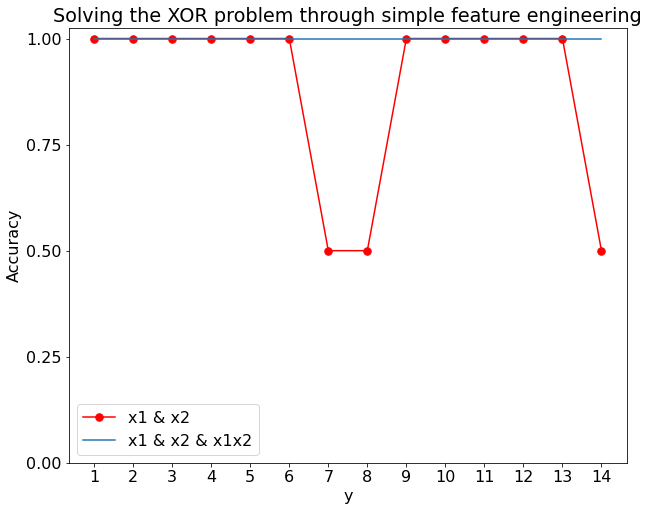

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.rcParams.update({'font.size': 16})
plt.plot(list(range(1, 15)), results,"r.-", markersize=15, label="x1 & x2")
plt.plot(list(range(1, 15)), results_2, label="x1 & x2 & x1x2")

plt.title("Solving the XOR problem through simple feature engineering")
plt.xlabel("y")
plt.ylabel("Accuracy")

plt.xticks(list(range(1, 15)))
plt.yticks([0, 0.25,0.5, 0.75, 1])

plt.legend(loc="lower left")

plt.show()